# Using YOLOv8 as a Data Labeler

In [2]:
!nvidia-smi

Mon Nov 20 18:35:47 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:01:00.0  On |                  Off |
|  0%   38C    P0              42W / 500W |   6287MiB / 24564MiB |     10%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Ryan Barry\OneDrive - rit.edu\Laptop Backup\Desktop\RIT\Robot Perception\Project\air-hockey-robot\data_collection


# Install YOLOv8 if it isn't already installed

In [2]:
!pip install -U ultralytics==8.0.58

from IPython.display import display, Image, clear_output
clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.58  Python-3.10.11 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Setup complete  (24 CPUs, 63.8 GB RAM, 1302.3/1862.2 GB disk)


# Load the Air Hockey model

In [3]:
YOLO_DIR = os.path.abspath(os.path.join(HOME, os.pardir, f"YOLOv8"))

BEST_RUN = "yolov8n_air_hockey21"
WEIGHTS_PATH = os.path.abspath(os.path.join(YOLO_DIR, "runs/detect", BEST_RUN, "weights/best.pt"))

model = YOLO(WEIGHTS_PATH)

# Import the training image file info as a DataFrame

In [4]:
import pandas as pd

file_df = pd.read_csv(os.path.abspath(os.path.join(HOME, "training_labels.csv")))

file_df.head()

Unnamed: 0          File Name          Time  \
0           0  image_0000000.jpg  11:47:02.306   
1           1  image_0000001.jpg  11:47:02.381   
2           2  image_0000002.jpg  11:47:02.419   
3           3  image_0000003.jpg  11:47:02.451   
4           4  image_0000004.jpg  11:47:02.486   

                                            Puck Box  \
0  [     409.54      4.4201      432.53      38.631]   
1  [      409.5      4.4685      432.51      38.661]   
2  [     409.56      4.2425      432.63      39.243]   
3  [     409.64      4.1823      432.64      39.191]   
4  [     409.66      4.1808      432.61      39.023]   

                                           Table Box  
0                                                NaN  
1                                                NaN  
2  [     93.351      12.305      314.34      388.81]  
3  [     93.314       12.38      314.32      388.47]  
4  [     93.353      12.402      314.43      388.57]

# Load images from the dataframe

In [6]:
from PIL import Image

IMAGE_DIR = f"{HOME}/training_data/"

def open_and_resize_image(file_path, size=(480,480)):
    # Open the image
    image = Image.open(file_path)
    
    # Resize the image
    resized_image = image.resize(size)
    
    # Return the resized image
    return resized_image

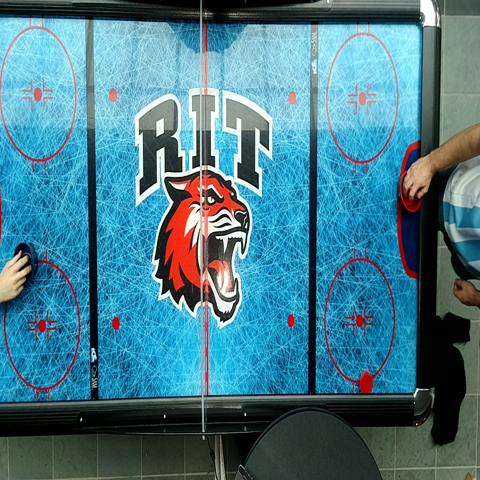

In [6]:
file_path = IMAGE_DIR + file_df.iloc[10000]["File Name"]

# Open and resize the image
resized_image = open_and_resize_image(file_path)

resized_image

C:\Users\Ryan Barry\AppData\Local\Temp\ipykernel_31224\907360749.py:3: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('TkAgg')


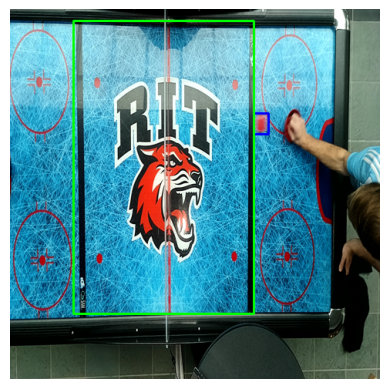

True

In [10]:
import cv2
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

FILE_NUM = 17776
path = IMAGE_DIR + file_df.iloc[FILE_NUM]["File Name"]
# Reading an image in default mode
image =open_and_resize_image(path)
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
# Window name in which image is displayed
window_name = 'Image'
bounding_box_str = file_df.at[FILE_NUM, "Puck Box"]

if bounding_box_str is not None:
    # Extract numerical values from the bounding box string
    values = [float(val) for val in bounding_box_str.replace('[', '').replace(']', '').split()]

    # Convert the list of numbers to a NumPy array
    result_array = np.array(values)

    # Convert the list of numbers to a NumPy array
    bounding_box = np.array(values)
    x1 = int(bounding_box[0])
    y1 = int(bounding_box[1])
    x2 = int(bounding_box[2])
    y2 = int(bounding_box[3])

    start_point = (x1, y1)
    end_point = (x2, y2)
    # Blue color in BGR
    color = (255, 0, 0)
    # Line thickness of 2 px
    thickness = 2
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)


if bounding_box_str is not None:
    bounding_box_str = file_df.at[FILE_NUM, "Table Box"]

    # Extract numerical values from the bounding box string
    values = [float(val) for val in bounding_box_str.replace('[', '').replace(']', '').split()]

    # Convert the list of numbers to a NumPy array
    result_array = np.array(values)

    # Convert the list of numbers to a NumPy array
    bounding_box = np.array(values)
    x1 = int(bounding_box[0])
    y1 = int(bounding_box[1])
    x2 = int(bounding_box[2])
    y2 = int(bounding_box[3])

    start_point = (x1, y1)
    end_point = (x2, y2)
    # Blue color in BGR
    color = (0, 255, 0)
    # Line thickness of 2 px
    thickness = 2
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()
cv2.imwrite("test.jpg", image)

In [2]:
import os
HOME = os.getcwd()

# Use Image Annotation class to visualize labeled data

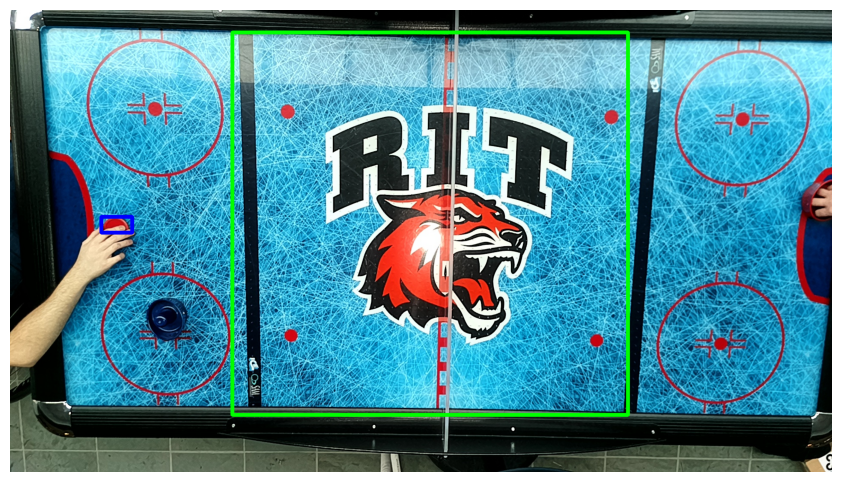

In [3]:
from annotate_images import Annotate_Image
%matplotlib inline
IMAGE_DIR = f"{HOME}/training_data/"
ai = Annotate_Image(26000, file_name="training_labels.csv", image_dir=IMAGE_DIR)
ai.annotate_image(size=[1920,1080], figsize=(12,6))


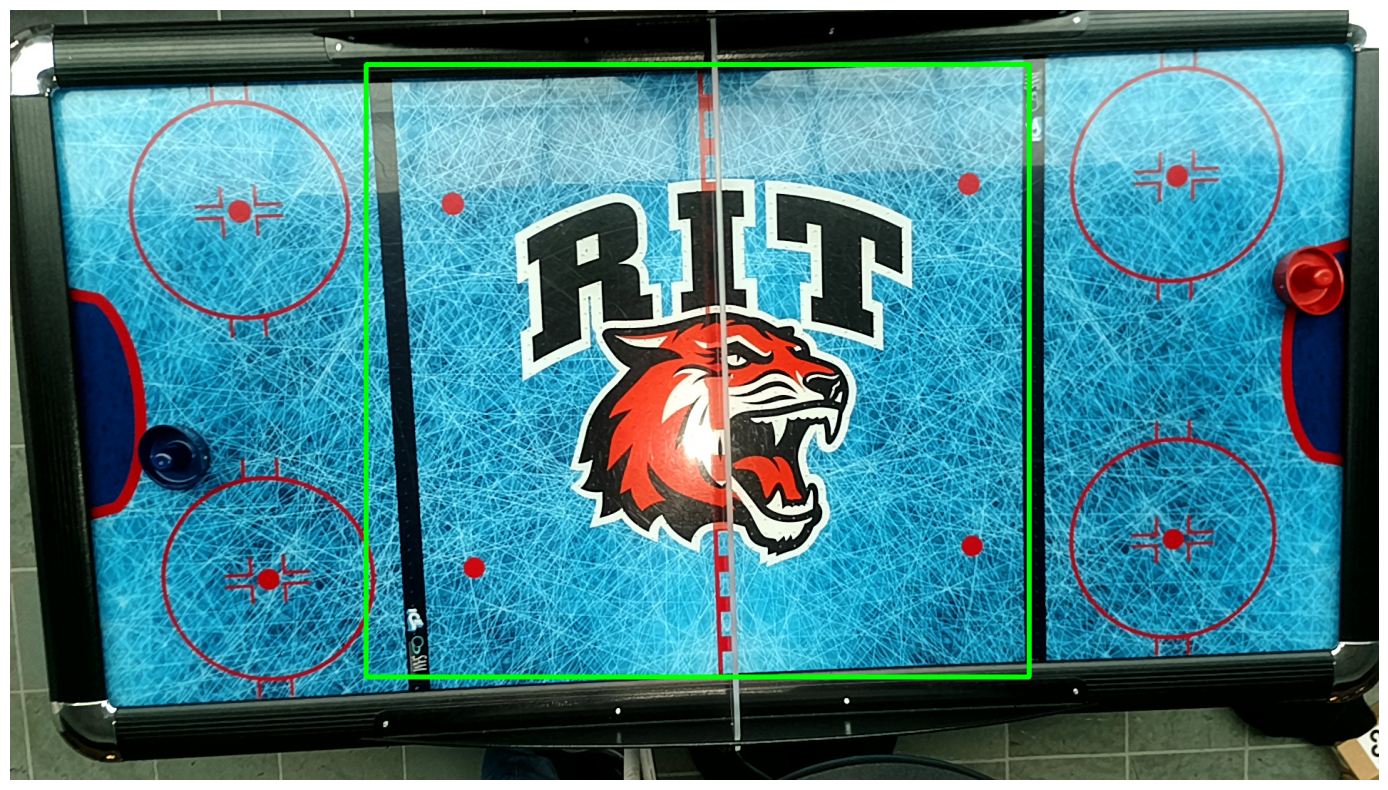

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

FILE_NUM = 19983
path = IMAGE_DIR + file_df.iloc[FILE_NUM]["File Name"]
# Reading an image in default mode
image = Image.open(path)
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
# Window name in which image is displayed
window_name = 'Image'
bounding_box_str = file_df.at[FILE_NUM, "Puck Box"]

if isinstance(bounding_box_str, str):
    # Extract numerical values from the bounding box string
    values = [float(val) for val in bounding_box_str.replace('[', '').replace(']', '').split()]

    # Convert the list of numbers to a NumPy array
    result_array = np.array(values)

    # Convert the list of numbers to a NumPy array
    bounding_box = np.array(values)
    x1 = int(bounding_box[0] * (1920 / 480))
    y1 = int(bounding_box[1] * (1080 / 480))
    x2 = int(bounding_box[2] * (1920 / 480))
    y2 = int(bounding_box[3] * (1080 / 480))

    start_point = (x1, y1)
    end_point = (x2, y2)
    # Blue color in BGR
    color = (255, 0, 0)
    # Line thickness of 2 px
    thickness = 5
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)



bounding_box_str = file_df.at[FILE_NUM, "Table Box"]
if isinstance(bounding_box_str, str):
    # Extract numerical values from the bounding box string
    values = [float(val) for val in bounding_box_str.replace('[', '').replace(']', '').split()]

    # Convert the list of numbers to a NumPy array
    result_array = np.array(values)

    # Convert the list of numbers to a NumPy array
    bounding_box = np.array(values)
    x1 = int(bounding_box[0] * (1920 / 480))
    y1 = int(bounding_box[1] * (1080 / 480))
    x2 = int(bounding_box[2] * (1920 / 480))
    y2 = int(bounding_box[3] * (1080 / 480))

    start_point = (x1, y1)
    end_point = (x2, y2)
    # Blue color in BGR
    color = (0, 255, 0)
    # Line thickness of 2 px
    thickness = 5
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [26]:
bounding_box_str

'[     82.038      15.625      315.86      395.04]'

In [45]:
bounding_box_str = file_df.at[FILE_NUM, "Puck Box"]

# Extract numerical values from the bounding box string
values = [float(val) for val in bounding_box_str.replace('[', '').replace(']', '').split()]

# Convert the list of numbers to a NumPy array
result_array = np.array(values)

print(result_array[1])

270.06


# Label Training Data
Run inference on each image and add the highest confidence table and puck bounding box for each image to the DataFrame

In [15]:
file_path = IMAGE_DIR + file_df.iloc[42]["File Name"]

# Open and resize the image
resized_image = open_and_resize_image(file_path)
results = model(resized_image)
image = cv2.cvtColor(np.array(resized_image), cv2.COLOR_RGB2BGR)
for r in results:
    for box in r.boxes:
        print(box.cls.cpu().numpy())
        print(box.conf.cpu().numpy())
        print(box.xyxy.cpu().numpy())  # print the Boxes object containing the detection bounding boxes
        start_point = (int(box.xyxy.cpu().numpy()[0][0]), int(box.xyxy.cpu().numpy()[0][1]))
        end_point = (int(box.xyxy.cpu().numpy()[0][2]), int(box.xyxy.cpu().numpy()[0][3]))
        if box.cls.cpu().numpy()[0] == 0:
            color = (0,255, 0)
        elif box.cls.cpu().numpy()[0] == 1:
            color = (0, 0,255)
        thickness = 2
        image = cv2.rectangle(image, start_point, end_point, color, thickness)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imwrite("test.jpg", image)


0: 480x480 1 P, 1 T, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 480)


[          1]
[    0.96099]
[[     81.841      15.422         316      395.23]]
[          0]
[     0.7135]
[[     377.73      270.06      394.07      297.08]]


True

In [135]:
if "Puck Box" not in file_df.columns:
    file_df["Puck Box"] = None
if "Table Box" not in file_df.columns:
    file_df["Table Box"] = None
    
LABELED = 26036
for index, row in file_df.iterrows():
    if index < LABELED:
        index += LABELED
    if not file_df.isnull().at[index, "Puck Box"] and not file_df.isnull().at[index, "Table Box"]:
        continue
    file_path = IMAGE_DIR + file_df.iloc[index]["File Name"]
    resized_image = open_and_resize_image(file_path)
    results = model(resized_image)
    table_conf = 0
    puck_conf = 0
    table_box = None
    puck_box = None
    for r in results:
        for box in r.boxes:
            cls = box.cls.cpu().numpy()
            conf = box.conf.cpu().numpy()
            bounding_box = box.xyxy.cpu().numpy()
            if cls[0] == 0:
                if conf > puck_conf and conf > 0.4:
                    puck_conf = conf[0]
                    puck_box = bounding_box[0]
            elif cls[0] == 1:
                if conf > table_conf and conf > 0.8:
                    table_conf = conf[0]
                    table_box = bounding_box[0]
        if table_box is not None:
            file_df.at[index, "Table Box"] = table_box
        if puck_box is not None:
            file_df.at[index, "Puck Box"] = puck_box
    clear_output()

KeyError: 26626

In [154]:
file_df.tail(50)

File Name          Time  \
26576  image_0026576.jpg  12:24:42.920   
26577  image_0026577.jpg  12:24:42.973   
26578  image_0026578.jpg  12:24:43.039   
26579  image_0026579.jpg  12:24:43.107   
26580  image_0026580.jpg  12:24:43.158   
26581  image_0026581.jpg  12:24:43.204   
26582  image_0026582.jpg  12:24:43.250   
26583  image_0026583.jpg  12:24:43.310   
26584  image_0026584.jpg  12:24:43.379   
26585  image_0026585.jpg  12:24:43.434   
26586  image_0026586.jpg  12:24:43.488   
26587  image_0026587.jpg  12:24:43.553   
26588  image_0026588.jpg  12:24:43.609   
26589  image_0026589.jpg  12:24:43.657   
26590  image_0026590.jpg  12:24:43.707   
26591  image_0026591.jpg  12:24:43.757   
26592  image_0026592.jpg  12:24:43.807   
26593  image_0026593.jpg  12:24:43.851   
26594  image_0026594.jpg  12:24:43.910   
26595  image_0026595.jpg  12:24:43.954   
26596  image_0026596.jpg  12:24:43.998   
26597  image_0026597.jpg  12:24:44.049   
26598  image_0026598.jpg  12:24:44.094   
26599  image_0026599.jpg  12:24:44.141   
26600  image_0026600.jpg  12:24:44.187   
26601  image_0026601.jpg  12:24:44.244   
26602  image_0026602.jpg  12:24:44.290   
26603  image_0026603.jpg  12:24:44.335   
26604  image_0026604.jpg  12:24:44.384   
26605  image_0026605.jpg  12:24:44.445   
26606  image_0026606.jpg  12:24:44.491   
26607  image_0026607.jpg  12:24:44.538   
26608  image_0026608.jpg  12:24:44.582   
26609  image_0026609.jpg  12:24:44.636   
26610  image_0026610.jpg  12:24:44.683   
26611  image_0026611.jpg  12:24:44.727   
26612  image_0026612.jpg  12:24:44.784   
26613  image_0026613.jpg  12:24:44.832   
26614  image_0026614.jpg  12:24:44.876   
26615  image_0026615.jpg  12:24:44.921   
26616  image_0026616.jpg  12:24:44.966   
26617  image_0026617.jpg  12:24:45.014   
26618  image_0026618.jpg  12:24:45.069   
26619  image_0026619.jpg  12:24:45.115   
26620  image_0026620.jpg  12:24:45.165   
26621  image_0026621.jpg  12:24:45.219   
26622  image_0026622.jpg  12:24:45.275   
26623  image_0026623.jpg  12:24:45.322   
26624  image_0026624.jpg  12:24:45.394   
26625  image_0026625.jpg  12:31:35.683   

                                                Puck Box  \
26576                                                NaN   
26577                                                NaN   
26578                                                NaN   
26579  [     441.07      209.63      457.36      238.26]   
26580  [     434.16      208.48      449.95      236.07]   
26581  [      424.9      205.09      441.61       232.1]   
26582  [     397.26      197.22      416.46      226.03]   
26583  [     272.15      179.45       290.5      208.13]   
26584  [     147.31      160.03      168.86       190.1]   
26585  [     129.62      100.45      146.69      130.94]   
26586  [     224.92      39.741      242.58      73.934]   
26587  [     308.56      157.07      327.11      187.21]   
26588  [     375.78      241.85      394.25      272.02]   
26589  [     391.74      263.28      408.73      292.33]   
26590  [     438.28      324.84      455.35      353.78]   
26591  [     455.64      366.08      470.74      391.93]   
26592  [     423.69      402.01      439.58      423.84]   
26593  [      410.9      392.83      426.08       420.1]   
26594  [     375.86      342.37      392.17      369.46]   
26595  [     363.13      325.13      380.92      352.01]   
26596  [     339.93      291.18      357.48      318.16]   
26597  [     316.27       255.5      334.18      283.52]   
26598  [     292.93      221.74       310.3      248.32]   
26599  [     258.17       165.7      274.67      195.07]   
26600  [     244.18      146.02      262.38      178.63]   
26601  [     208.97      90.714      226.34      122.18]   
26602  [     184.18      53.032      201.73      84.233]   
26603  [     156.82      15.758      176.79       44.33]   
26604  [     123.03      57.374      143.03      89.305]   
26605  [     99.747      91.656      118.41      122.76]   
26606  [    

In [96]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

path = IMAGE_DIR + file_df.iloc[10]["File Name"]
# Reading an image in default mode
image =open_and_resize_image(path)
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
# Window name in which image is displayed
window_name = 'Image'
bounding_box = file_df.iloc[3]["Puck Box"]

start_point = (int(bounding_box[0]), int(bounding_box[1]))
end_point = (int(bounding_box[2]), int(bounding_box[3]))
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)
bounding_box = file_df.iloc[3]["Table Box"]

start_point = (int(bounding_box[0]), int(bounding_box[1]))
end_point = (int(bounding_box[2]), int(bounding_box[3]))
# Blue color in BGR
color = (0, 255, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)
# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imwrite("test.jpg", image)

TypeError: 'NoneType' object is not subscriptable

In [152]:
file_df.to_csv("training_labels.csv")

In [150]:
file_df = file_df.drop(columns=file_df.columns[file_df.columns.str.contains('Unnamed')])

In [153]:
file_df = pd.read_csv(os.path.abspath(os.path.join(HOME, "training_labels.csv")))
file_df = file_df.drop(columns=file_df.columns[file_df.columns.str.contains('Unnamed')])